In [1]:
#Imports for data processing
import pandas as pd
import numpy as np

#Imports for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Imports for machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Imports for hyperparameters tuning
from sklearn.model_selection import GridSearchCV

#Imp[orts to save the final model
import joblib

#Optional import to avoid the warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
#Code for the user input so that data type and path is defined.
print("Please enter the type of file you want to use as your data \n 1.CSV \n 2.Excel \n 3.JSON")
choice=int(input("Enter your choice (number only): "))

if choice==1:
    path=input("Plese enter the path of your CSV data file")
    df=pd.read_csv(path)
elif choice==2:
    path=input("Please enter the path of your Excel data file")
    df=pd.read_excel(path)
elif choice==3:
    path=input("Please enter the path of your JSON data file")
    df=pd.read_json(path)
else: print("Invalid choice")

Please enter the type of file you want to use as your data 
 1.CSV 
 2.Excel 
 3.JSON


Enter your choice (number only):  1
Plese enter the path of your CSV data file /media/heytanix/SSD2/Python_Projects/Predictive_Modeling_project/Data/BostonHousing.csv


In [26]:
#For displaying the first few rows of the dataset to ensure it has been loaded correctly
print("These are the first few rows of the data-set you inserted, please make sure that it has been loaded correctly using this as a reference:")
print(df.head())


These are the first few rows of your dataset, please make sure that it has been loaded correctly using this as a reference:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [27]:
#Giving basic information about the provided dataset
print(df.info())

#Giving statistical summary of the provided datase
print(df.describe())

#Checking for missing values within the dataset
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

In [28]:
#Median method - for eliminating missing values within the provided dataset
df.fillna(df.median(),inplace=True)

In [29]:
#Simply to check if the missing values have been resolved
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [30]:
#Method to change categorical variables into numerical values
df=pd.get_dummies(df,drop_first=True)

In [32]:
from sklearn.preprocessing import StandardScaler

#Initializing a scaler
scaler=StandardScaler()

#Ask user for calculative parameters (THis method helps for different datas)
print("Please select the target variable (y) and the features (X) to use for the model.")
print("Available columns: ",df.columns)

while True:
    tar_var=input("Enter the target variable (y): ")
    if tar_var in df.columns:
        break
    else:
        print("Invalid column name, Please try again.")

while True:
    features=input("Enter the features (X) to use, separated by commas: ")
    ft_lst=[feature.strip() for feature in features.split(",")]
    if all(feature in df.columns for feature in ft_lst):
        break
    else:
        print("Invalid column name(s). Please try again.")

#Assigning the target variable and features
y=df[tar_var]
X=df[ft_lst]

#For sacling the features
X_scaled=scaler.fit_transform(X)

Please select the target variable (y) and the features (X) to use for the model.
Available columns:  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


Enter the target variable (y):  tax
Enter the features (X) to use, separated by commas:  age,rad


In [33]:
# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (404, 2)
Testing data shape: (102, 2)


In [34]:
# Initialize the model
model=RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train,y_train)

# Predict on the test set
y_pred=model.predict(X_test)

In [35]:
# Evaluate the model
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 44.668480323501946
Mean Squared Error: 5419.088710397657
R² Score: 0.8262231156604798


In [42]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over (you can adjust these hyperparameters as needed)
para_grd={
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [10, 20, None],               # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
}

# Initialize the RandomForest model
rf_model=RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV
grid_search=GridSearchCV(estimator=rf_model,para_grd=para_grd,cv=3,scoring='r2',n_jobs=-1,verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train,y_train)

# Best hyperparameters
print("Best Hyperparameters: ",grid_search.best_params_)

# Get the best estimator (model with best parameters)
bst_mdl=grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


Please select the target variable (y) and the features (X) to use for the model.
Available columns:  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


Enter the target variable (y):  tax
Enter the features (X) to use, separated by commas:  age,rad


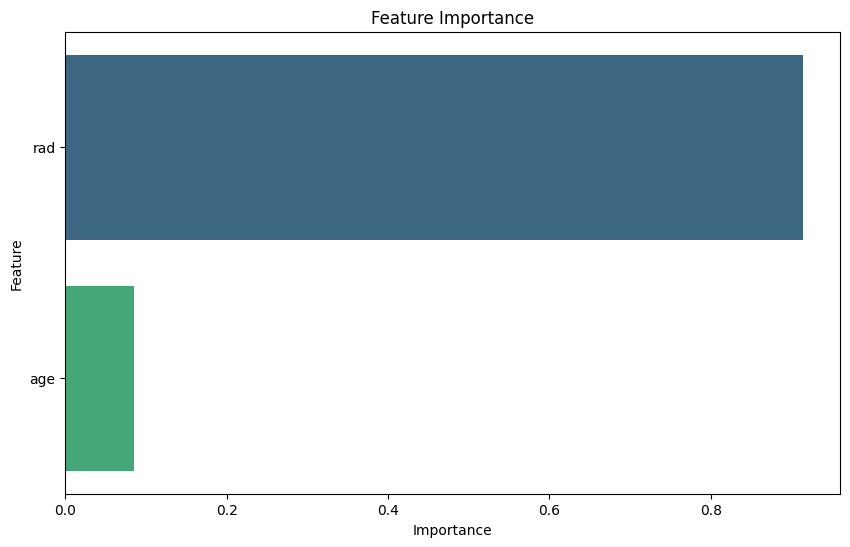

In [48]:
from sklearn.preprocessing import StandardScaler

# Initialize a scaler
scaler=StandardScaler()

# Ask the user what to calculate over what
print("Please select the target variable (y) and the features (X) to use for the model.")
print("Available columns: ", df.columns)

while True:
    tar_var=input("Enter the target variable (y): ")
    if tar_var in df.columns:
        break
    else:
        print("Invalid column name. Please try again.")

while True:
    features=input("Enter the features (X) to use, separated by commas: ")
    ft_lst=[feature.strip() for feature in features.split(",")]
    if all(feature in df.columns for feature in ft_lst):
        break
    else:
        print("Invalid column name(s). Please try again.")

# Assign the target variable and features
y=df[tar_var]
X=df[ft_lst]

# Scale the features
X_scaled=scaler.fit_transform(X)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.show()

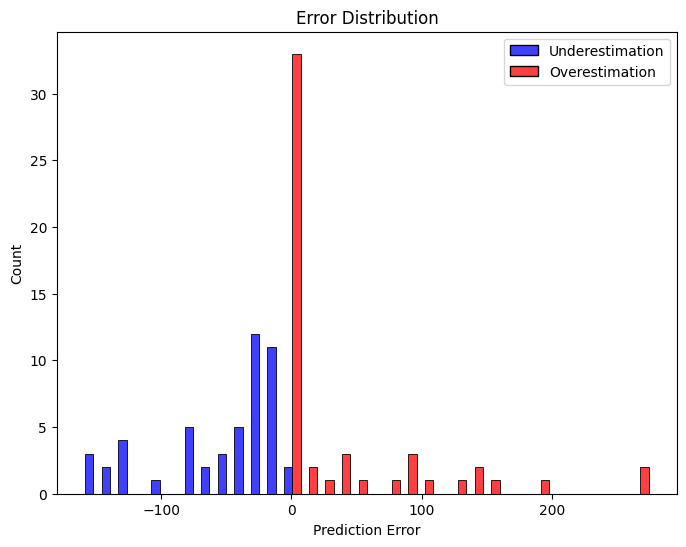

In [51]:
# Calculate the errors
errs=y_test-y_pred

# Create a categorical variable to differentiate in the histogram
err_typ=['Underestimation' if error<0 else 'Overestimation' for error in errs]

# Plot the distribution of errors
plt.figure(figsize=(8,6))
sns.histplot(x=errs,hue=err_typ,multiple='dodge',palette=['blue','red'])
plt.title('Error Distribution')
plt.xlabel('Prediction Error')
plt.show()

In [39]:
import joblib

# Save the best model to a file
joblib.dump(bst_mdl,'first_prediction_model.pkl')

['first_prediction_model.pkl']

In [40]:
# To load the saved model later
loadedmodel=joblib.load('first_prediction_model.pkl')